<a href="https://colab.research.google.com/github/maksimowich/CoreJava/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.io import wavfile
from scipy.fft import fft
from scipy.signal import butter, lfilter, filtfilt
import matplotlib.pyplot as plt

In [ ]:
# Загрузка аудиофайла
sample_rate, audio_data = wavfile.read('sample11.wav')

<ipython-input-4-c030dce23f10>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read('sample15.wav')


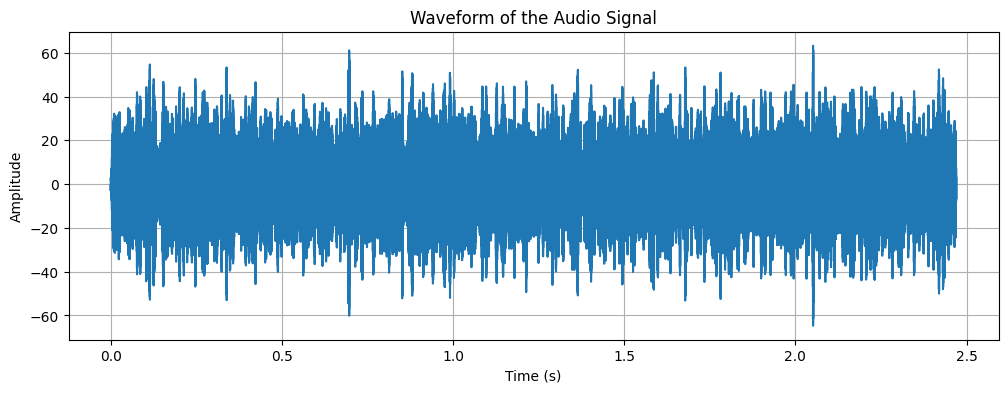

In [ ]:
# Построение временного графика сигнала
time = np.arange(audio_data.shape[0]) / sample_rate
plt.figure(figsize=(12, 4))
plt.plot(time, audio_data)
plt.title('Waveform of the Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

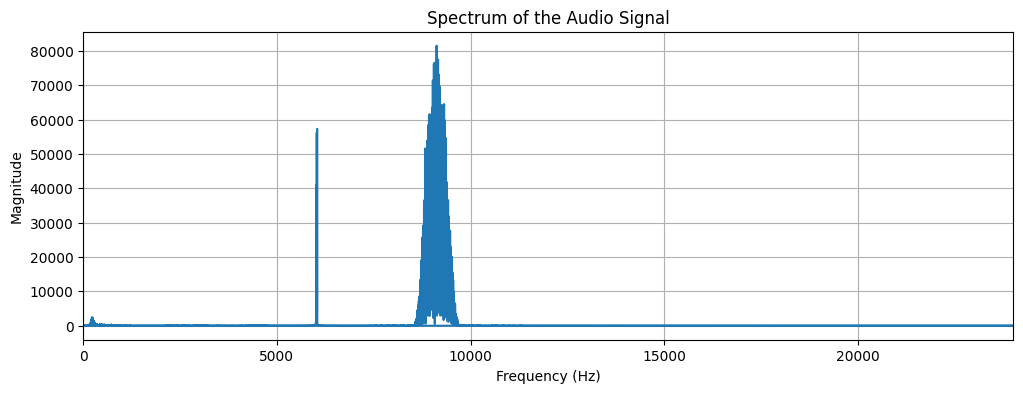

In [ ]:
# Расчет и построение спектра сигнала
audio_spectrum = fft(audio_data)
frequencies = np.fft.fftfreq(len(audio_data), 1/sample_rate)
plt.figure(figsize=(12, 4))
plt.plot(frequencies, np.abs(audio_spectrum))
plt.title('Spectrum of the Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim([0, sample_rate/2])
plt.show()

In [ ]:
# Функция для низкочастотной фильтрации
def butter_lowpass_filter(data, cutoff, fs, order=5):
  b, a = butter(order, cutoff / (0.5 * fs), btype='low', analog=False)
  y = lfilter(b, a, data)
  return y

In [ ]:
# Параметры фильтра
cutoff_low_frequency = 1000.0 # Частота среза в Гц
order = 7 # Порядок фильтра

In [ ]:
# Применение фильтра
filtered_audio_data = butter_lowpass_filter(audio_data, cutoff_low_frequency, sample_rate, order)

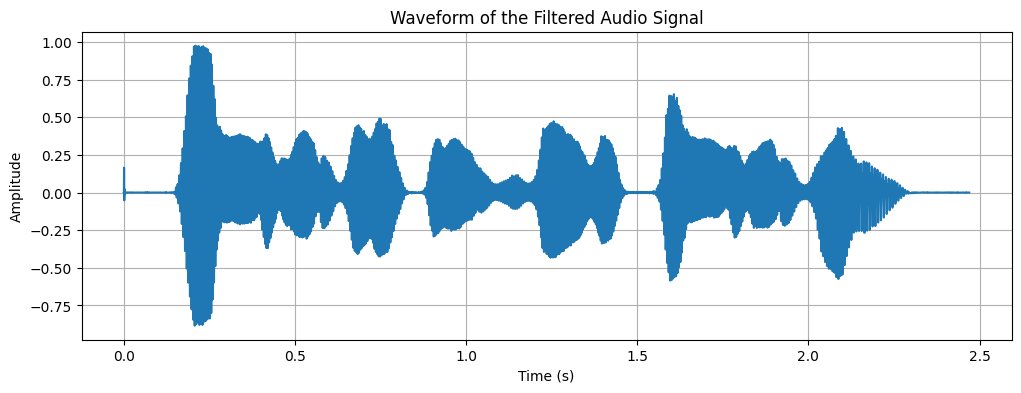

In [ ]:
# Расчет и построение спектра отфильтрованного сигнала
filtered_audio_spectrum = fft(filtered_audio_data)
plt.figure(figsize=(12, 4))
plt.plot(time, filtered_audio_data)
plt.title('Waveform of the Filtered Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

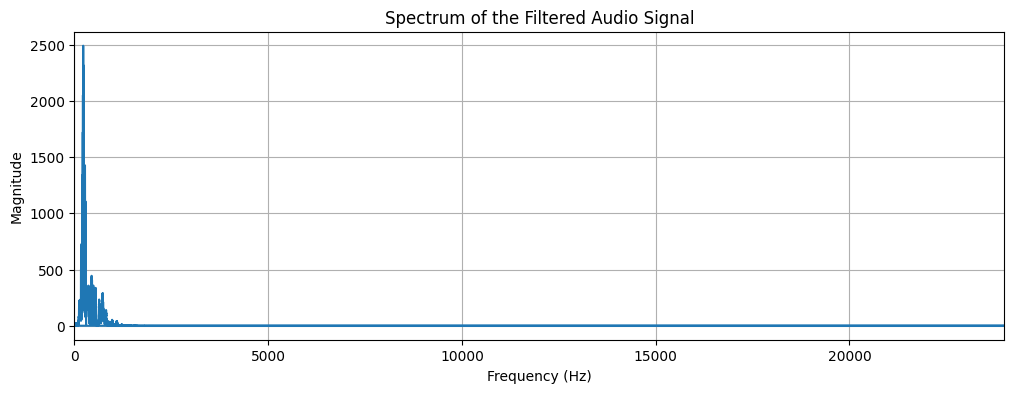

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(frequencies, np.abs(filtered_audio_spectrum))
plt.title('Spectrum of the Filtered Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim([0, sample_rate/2])
plt.show()

In [ ]:
# Сохранение отфильтрованного аудиофайла
filtered_file_path = 'filtered_sample15.wav'
filtered_audio_data_normalized = np.int16(filtered_audio_data / np.max(np.abs(filtered_audio_data)) * 32767)
wavfile.write(filtered_file_path, sample_rate, filtered_audio_data_normalized)